In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings(action = 'ignore')

In [4]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 데이터 전처리 

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna()
df = df.drop('id',axis = 1)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
num_cols = ['age','avg_glucose_level','bmi']
obj_cols = list(set(df.columns.tolist()) - set(num_cols))

In [9]:
for _ in obj_cols:
    print(df[_].value_counts())
    print('---' * 15)

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
---------------------------------------------
0    4666
1     243
Name: heart_disease, dtype: int64
---------------------------------------------
Yes    3204
No     1705
Name: ever_married, dtype: int64
---------------------------------------------
0    4700
1     209
Name: stroke, dtype: int64
---------------------------------------------
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
---------------------------------------------
0    4458
1     451
Name: hypertension, dtype: int64
---------------------------------------------
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64
---------------------------------------------
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
---------------------------------------------


In [10]:
df = df[df['gender'] != 'Other']

# 데이터 시각화 

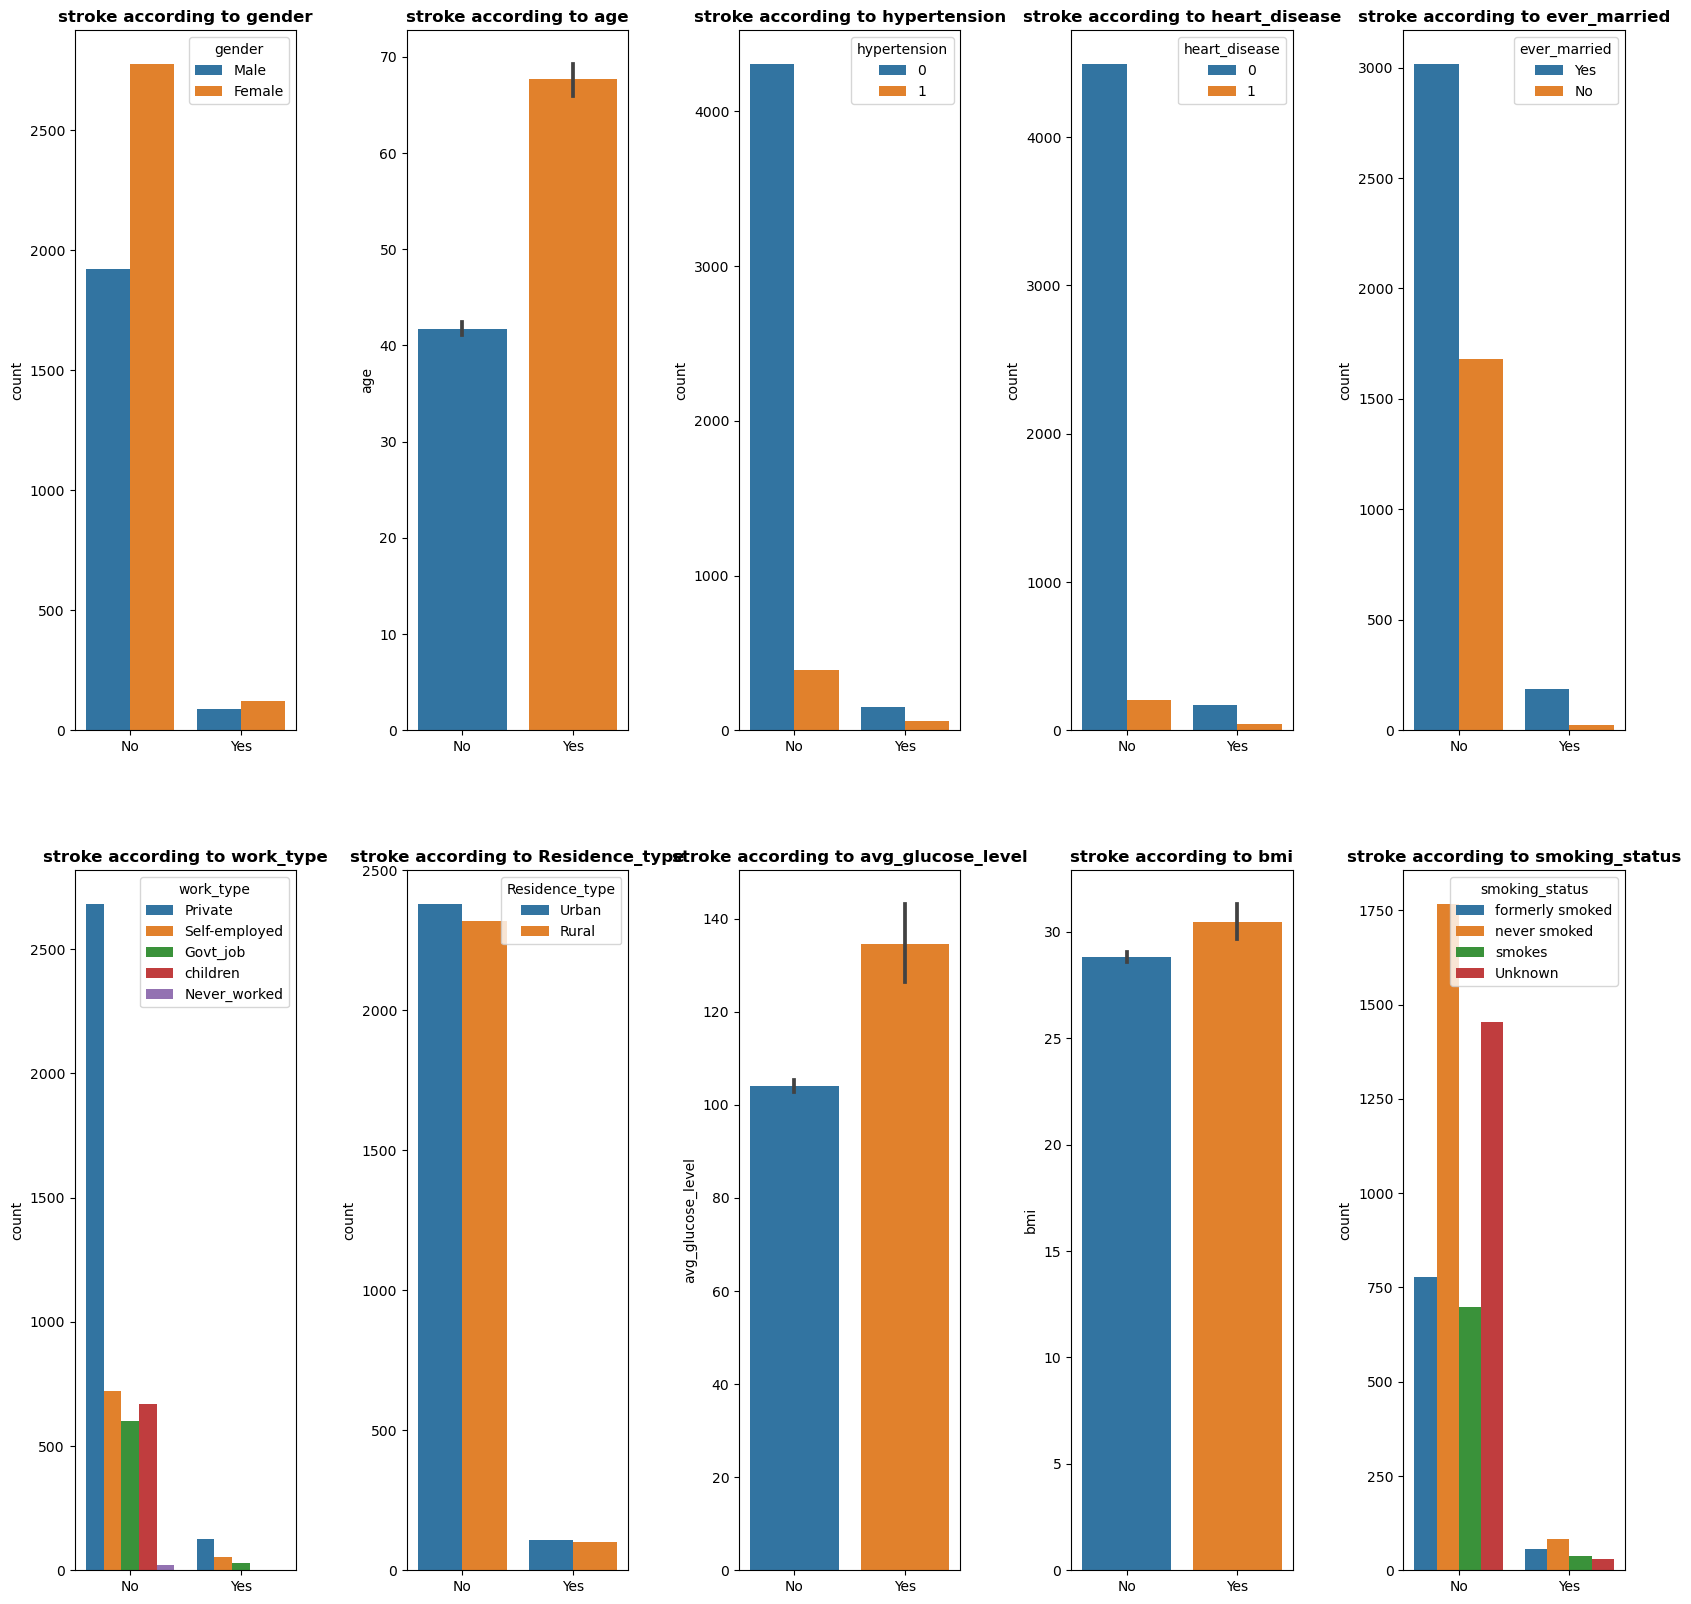

In [11]:
cols = df.columns.tolist()

plt.figure(figsize = [20,20])
plt.subplots_adjust(wspace = 0.5)

for i,var in enumerate(cols[:-1]):
    
    plt.subplot(2,5,i+1)
    
    if var in obj_cols:
        sns.countplot(data = df,
                    x = 'stroke',
                    hue = var)
    else:
        sns.barplot(data = df,
                    x = 'stroke',
                    y = var)
        
    plt.title(f'stroke according to {var}', weight = 'bold')
    plt.xlabel('')
    plt.xticks(ticks = [0,1],labels = ['No','Yes'])

In [12]:
def min_max_scaler(x):
    
    mini = min(x)
    maxi = max(x)
    
    return (x-mini)/(maxi - mini)

In [13]:
df['age'] = (df['age'] + 1).astype(int)

for _ in num_cols[:-1]:
    
    print(_,min(df[_]))
    df[_] = min_max_scaler(df[_])

age 1
avg_glucose_level 55.12


In [14]:
for _ in obj_cols[1:]:
    
    dicted = {}
    
    unique = df[_].unique()
    
    for num in range(df[_].nunique()):
        
        dicted[unique[num]] = num
        
    print(_)
    print(dicted)
    df[_] = df[_].map(dicted)

heart_disease
{1: 0, 0: 1}
ever_married
{'Yes': 0, 'No': 1}
stroke
{1: 0, 0: 1}
work_type
{'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
hypertension
{0: 0, 1: 1}
smoking_status
{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}
gender
{'Male': 0, 'Female': 1}


In [15]:
for _ in obj_cols:
    df[_] = df[_].astype(str)
    
train = df.drop('stroke',axis = 1)

train = pd.get_dummies(train)

train['stroke'] = df['stroke'].astype(int)

df = train.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4908 non-null   float64
 1   avg_glucose_level     4908 non-null   float64
 2   bmi                   4908 non-null   float64
 3   gender_0              4908 non-null   uint8  
 4   gender_1              4908 non-null   uint8  
 5   hypertension_0        4908 non-null   uint8  
 6   hypertension_1        4908 non-null   uint8  
 7   heart_disease_0       4908 non-null   uint8  
 8   heart_disease_1       4908 non-null   uint8  
 9   ever_married_0        4908 non-null   uint8  
 10  ever_married_1        4908 non-null   uint8  
 11  work_type_0           4908 non-null   uint8  
 12  work_type_1           4908 non-null   uint8  
 13  work_type_2           4908 non-null   uint8  
 14  work_type_3           4908 non-null   uint8  
 15  work_type_4          

# 모델링

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import roc_curve, auc,confusion_matrix, precision_score, recall_score, f1_score

In [18]:
x_train,y_train,x_test,y_test = train_test_split(df.drop('stroke',axis = 1), df['stroke'], test_size = 0.2,stratify =df['stroke'])

In [19]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
logist = LogisticRegression()

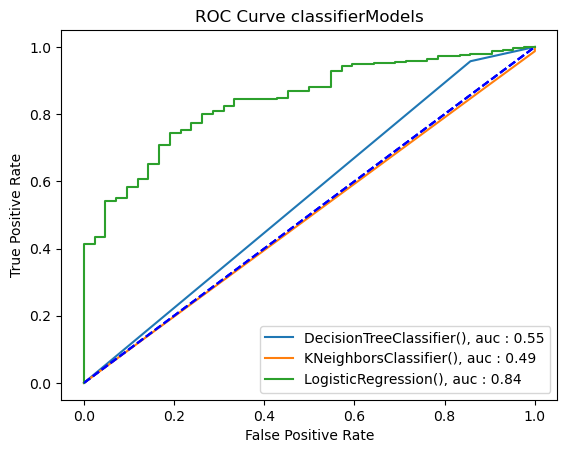

In [20]:
models = [tree,knn,logist]
y_test = np.array(y_test).reshape(-1,1)

for model in models:
    
    model = model 
    
    model.fit(x_train,x_test)
    
    probs = model.predict_proba(y_train)
    
    fpr,tpr, thr = roc_curve(y_test,probs[:,1])
    roc_auc = round(auc(fpr,tpr),2)
    
    plt.plot(fpr,tpr,label = f'{model}, auc : {roc_auc}')
    plt.plot([0,1],[0,1], 'b--')
    
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve classifierModels')

# 로지스틱 회귀분석을 사용 할 건데 

* 라쏘와 릿지, 엘라스틱넷중에 어떤걸 쓸까?

In [21]:
Ridge = LogisticRegression()
Lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear')
Elasticnet = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)

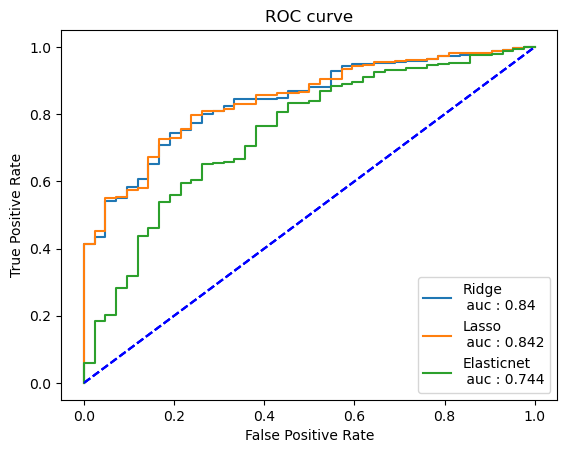

In [22]:
models = [Ridge,Lasso,Elasticnet]

name = ['Ridge','Lasso','Elasticnet']

i  = 0

for model in models:
    
    model = model
    
    model.fit(x_train,x_test)
    
    probs = model.predict_proba(y_train)[:,1]
    
    fpr,tpr,_ = roc_curve(y_test,probs)
    
    roc_auc = round(auc(fpr,tpr),3)
    
    plt.plot(fpr,tpr, label = f'{name[i]}\n auc : {roc_auc}')
    plt.plot([0,1],[0,1],'b--')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()
    
    i += 1

### 릿지 회귀분석을 써야겠다.
### 규제 정도는 얼마나 하고 임계점은 어떻게 할건데 ?

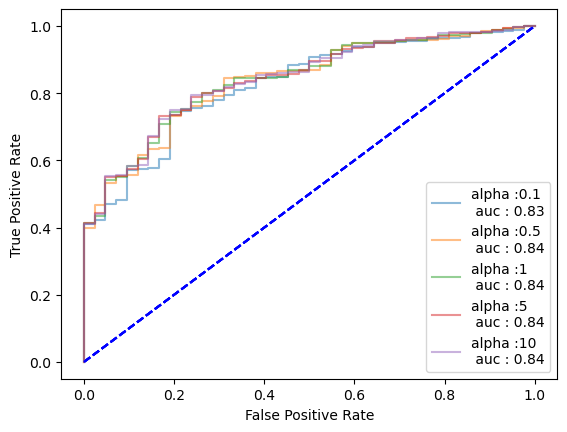

In [23]:
cost = [0.1,0.5,1,5,10]

for _ in cost:
    
    model = LogisticRegression(C = _, penalty = 'l2')
    
    model.fit(x_train,x_test)
    
    probs = model.predict_proba(y_train)[:,1]
    
    fpr,tpr,thr = roc_curve(y_test,probs)
    
    roc_auc = round(auc(fpr,tpr),2)
    
    plt.plot(fpr,tpr,label = f'alpha :{_} \n auc : {roc_auc}', alpha = 0.5)
    plt.plot([0,1],[0,1],'b--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

* 규제정도는 큰 차이가 없는 거 같다. 
* 임계점을 찾아보자 

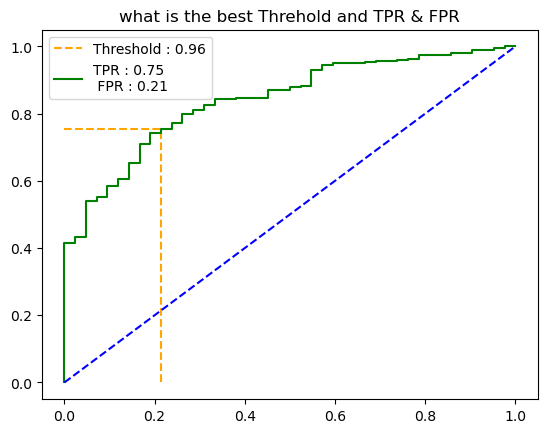

In [24]:
probs = Ridge.predict_proba(y_train)[:,1]

fpr,tpr, thr = roc_curve(y_test,probs)


idx = np.min(np.where(tpr > 0.75))

plt.title('what is the best Threhold and TPR & FPR')

plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]], ls = '--', c = 'orange', label = f'Threshold : {round(thr[idx],2)}')
plt.plot([fpr[idx],fpr[idx]],[0,tpr[idx]], ls = '--', c = 'orange')

plt.plot(fpr,tpr, color = 'green', label = f'TPR : {round(tpr[idx],2)}\n FPR : {round(fpr[idx],2)}')
plt.plot([0,1],[0,1], 'b--')
plt.legend()

In [25]:
predict = np.where(probs >= thr[idx],1,0).reshape(-1,1)

print('Accuracy: ',np.sum(predict == y_test)/ len(y_test))

Accuracy:  0.754582484725051


<AxesSubplot:>

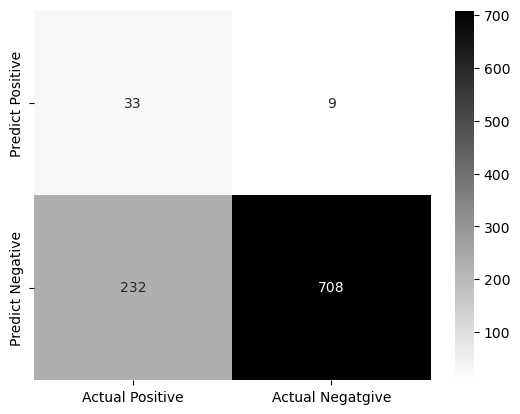

In [26]:
cm = confusion_matrix(y_test,predict)

cm_df = pd.DataFrame(data = cm , columns = ['Actual Positive','Actual Negatgive'],index = ['Predict Positive','Predict Negative'])

sns.heatmap(cm_df, cmap = 'binary', annot = True, fmt = 'd')

In [27]:
pd.DataFrame({'Coeffcient':Ridge.coef_[0].tolist(),
             'Odds':np.exp(Ridge.coef_[0]).tolist()},index = x_train.columns)

,Coeffcient,Odds
age,-4.759549,0.008569
avg_glucose_level,-1.064876,0.344771
bmi,0.013548,1.013641
gender_0,0.554233,1.740606
gender_1,0.670607,1.955423
hypertension_0,0.912029,2.489369
hypertension_1,0.312810,1.367262
heart_disease_0,0.394023,1.482935
heart_disease_1,0.830817,2.295192
ever_married_0,0.617001,1.853362
